In [1]:
from importlib import reload


import pandas as pd
import numpy as np

from sklearn import preprocessing
from statsmodels.stats.multicomp import pairwise_tukeyhsd


import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import analysis2 as a2
from flutype.utils import django_setup
from flutype.models import Spot



from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table', 'table style="display:inline"'), raw=True)

****************************************
RUNNING IN DEVELOP
****************************************


In [2]:
reload(a2)
studies = ["elisa_2017_12_12"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.exclude(raw_spot__column=1)
#data_elisa = a2.Data(spots_dj=spots_dj, impute=True)#.outlier_filtering()

In [3]:
#data_elisa = a2.Data(spots_dj=spots_dj, impute=True)#.outlier_filtering()


In [4]:
collections = ["2017_12_11_elisa_cal"]
spots_cal = spots_dj.filter(raw_spot__raw_spot_collection__sid__in=collections)
data_elisa_cal = a2.Data(spots_dj=spots_cal, impute=True)#.outlier_filtering()

collections = ["2017_12_12_elisa_panama"]
spots_old = spots_dj.filter(raw_spot__raw_spot_collection__sid__in=collections)
data_elisa_old = a2.Data(spots_dj=spots_old, impute=True)#.outlier_filtering()

collections = ["2017_12_12_elisa_panama_new"]
spots_new = spots_dj.filter(raw_spot__raw_spot_collection__sid__in=collections)
data_elisa_new = a2.Data(spots_dj=spots_new, impute=True)#.outlier_filtering()

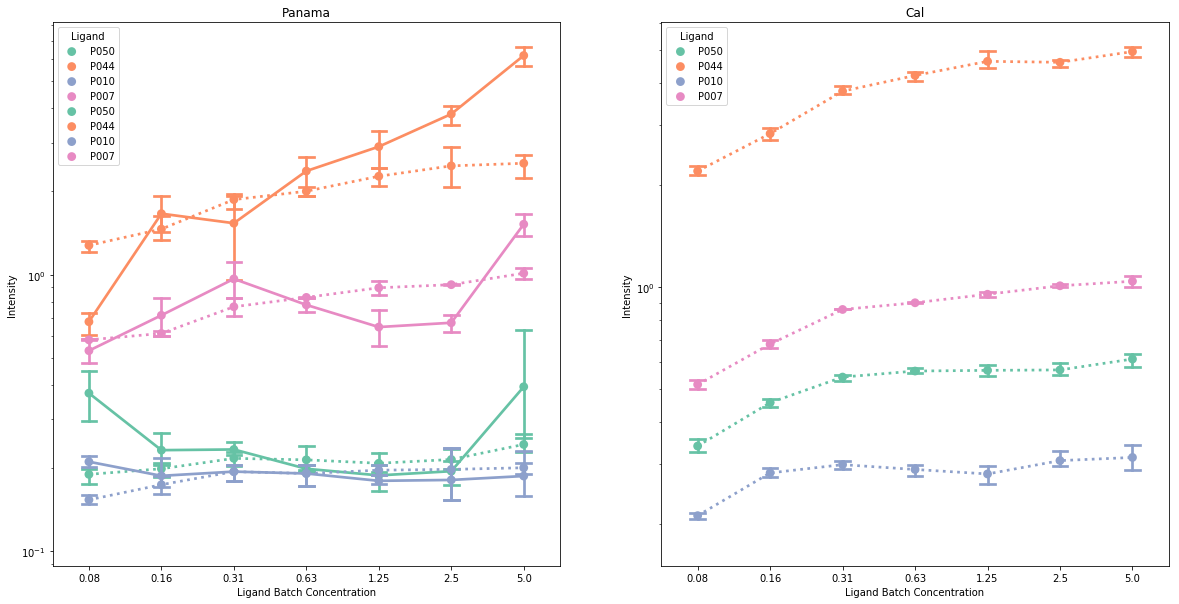

In [5]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].set_title("Panama")
sns.pointplot(ax= ax[0],palette="Set2", x="Ligand Batch Concentration", y="Intensity", hue="Ligand",data=data_elisa_old.spots_pd,capsize=.2, alpha=0.2)
sns.pointplot(ax= ax[0],palette="Set2",  x="Ligand Batch Concentration", y="Intensity", hue="Ligand",data=data_elisa_new.spots_pd,capsize=.2, linestyles=':')
ax[0].set_yscale("log")
ax[1].set_title("Cal")
sns.pointplot(ax= ax[1],palette="Set2", x="Ligand Batch Concentration", y="Intensity", hue="Ligand",data=data_elisa_cal.spots_pd,capsize=.2, linestyles=':')
ax[1].set_yscale("log")

In [105]:
data_buffer = data_elisa_old.subset_ligand_batches(["Buffer001"])

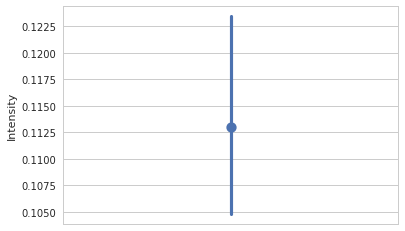

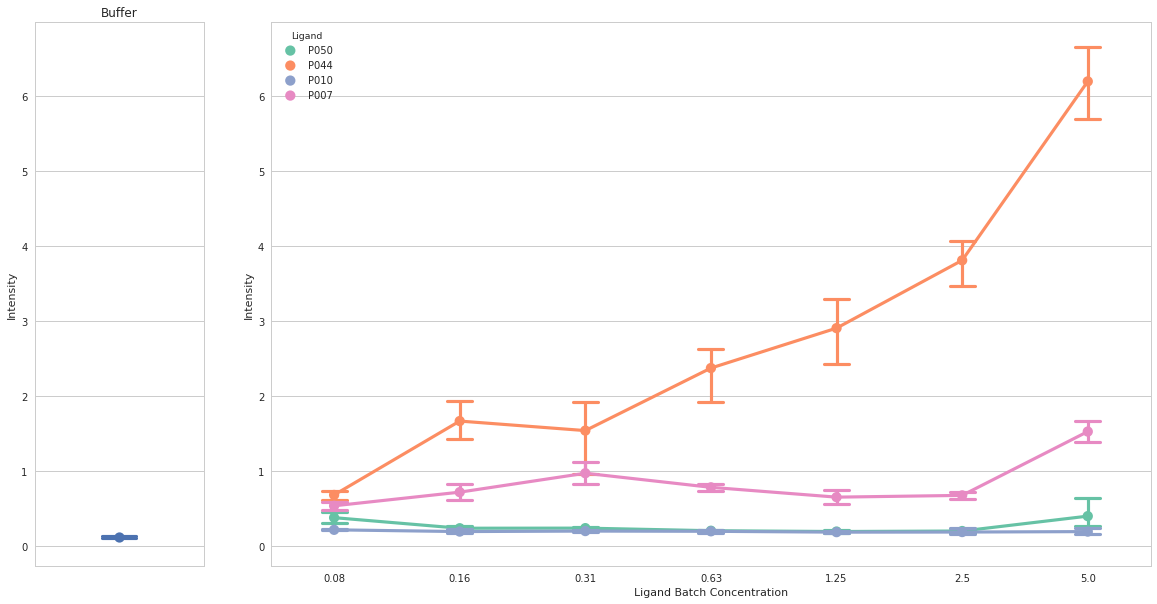

In [129]:
sns.set(style="whitegrid")
#fig, ax = plt.subplots(1,2,figsize=(20,10), sharey=True)
fig = plt.figure(figsize=(20,10))
gs = plt.GridSpec(1, 5, wspace=0.4, hspace=0.3,)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:], sharey=ax1)
ax1.set_title("Buffer")

sns.pointplot(ax=ax2,palette="Set2", x="Ligand Batch Concentration", y="Intensity", hue="Ligand", data=data_elisa_old.spots_pd,
                   capsize=.2)

sns.pointplot(ax=ax1 ,data=data_buffer.spots_pd, y="Intensity",capsize=.2)
ax[0].set_yscale("log")
#g.despine(left=True)
plt.show()

In [82]:
studies = ["elisa_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
#spots_dj = spots_dj.exclude(raw_spot__column=1)
data_elisa = a2.Data(spots_dj=spots_dj, impute=True)#.outlier_filtering()

In [83]:
# results dictionary
frames = {}
# iterate over collections and analyte batch
for cn, d in data_elisa.spots_pd.groupby(["Collection", "Analyte Batch"]):
    # normalize with respective buffer value
    x = d.copy()
    buffer_ref = d[d["Ligand Batch"] == "Buffer001"].Intensity.mean()
    x.Intensity = d.Intensity/buffer_ref
    frames[cn] = x
spots_pd_norm = pd.concat(frames)
data_elisa_norm1 = a2.Data(spots_pd=spots_pd_norm,impute=True)

In [84]:
frames = {}
for cn, d in  data_elisa_norm1.spots_pd.groupby(["Collection","Ligand Batch"]):
    x = d.copy()
    x["Intensity"] = d["Intensity"]/d[d["Analyte Batch"] == "Buffer001"]["Intensity"].mean()
    frames[cn]=x
spots_pd_norm = pd.concat(frames)
data_elisa_norm3 = a2.Data(spots_pd=spots_pd_norm,impute=True)

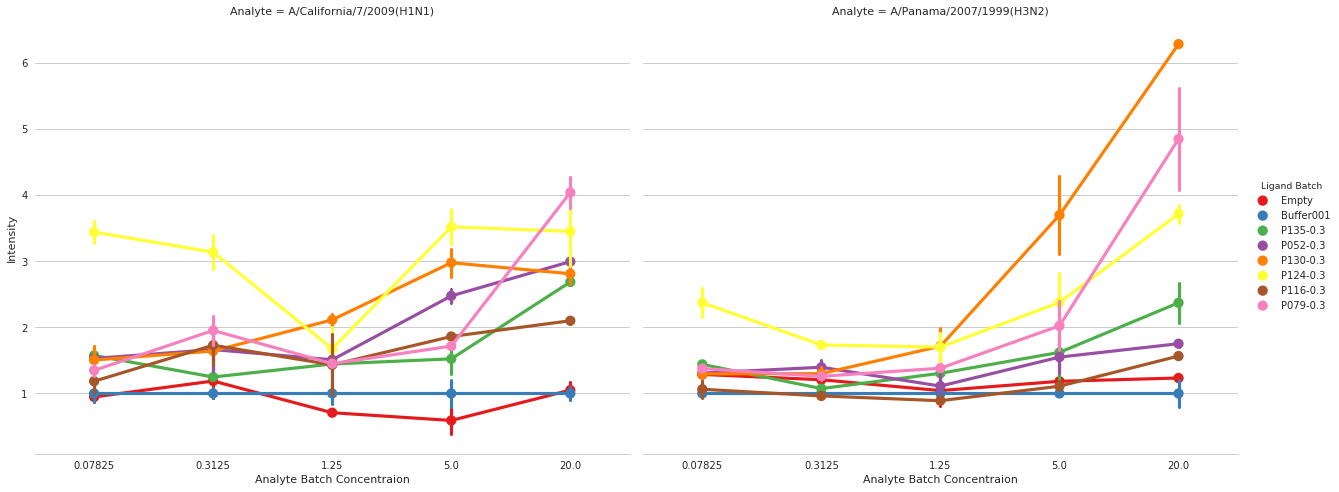

In [132]:
sns.set(style="whitegrid")
g = sns.factorplot(palette="Set1",x="Analyte Batch Concentraion", y="Intensity", col="Analyte", hue="Ligand Batch", data=data_elisa_norm1.spots_pd, size=7, aspect=1.25)#,capsize=.2)
g.despine(left=True)
plt.show()

Text(0.5,1,'Analyte = Buffer001')

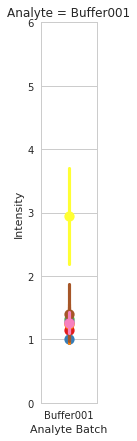

In [141]:
fig, ax = plt.subplots(1,1,figsize=(1,7))
data_buffer = data_elisa_norm1.spots_pd[data_elisa_norm1.spots_pd["Analyte Batch"] == "Buffer001"]
sns.pointplot(ax=ax, palette="Set1",x="Analyte Batch", y="Intensity",  hue="Ligand Batch",data=data_buffer)
ax.set_ylim(0,6)
ax.legend_.remove()
ax.set_title("Analyte = Buffer001")

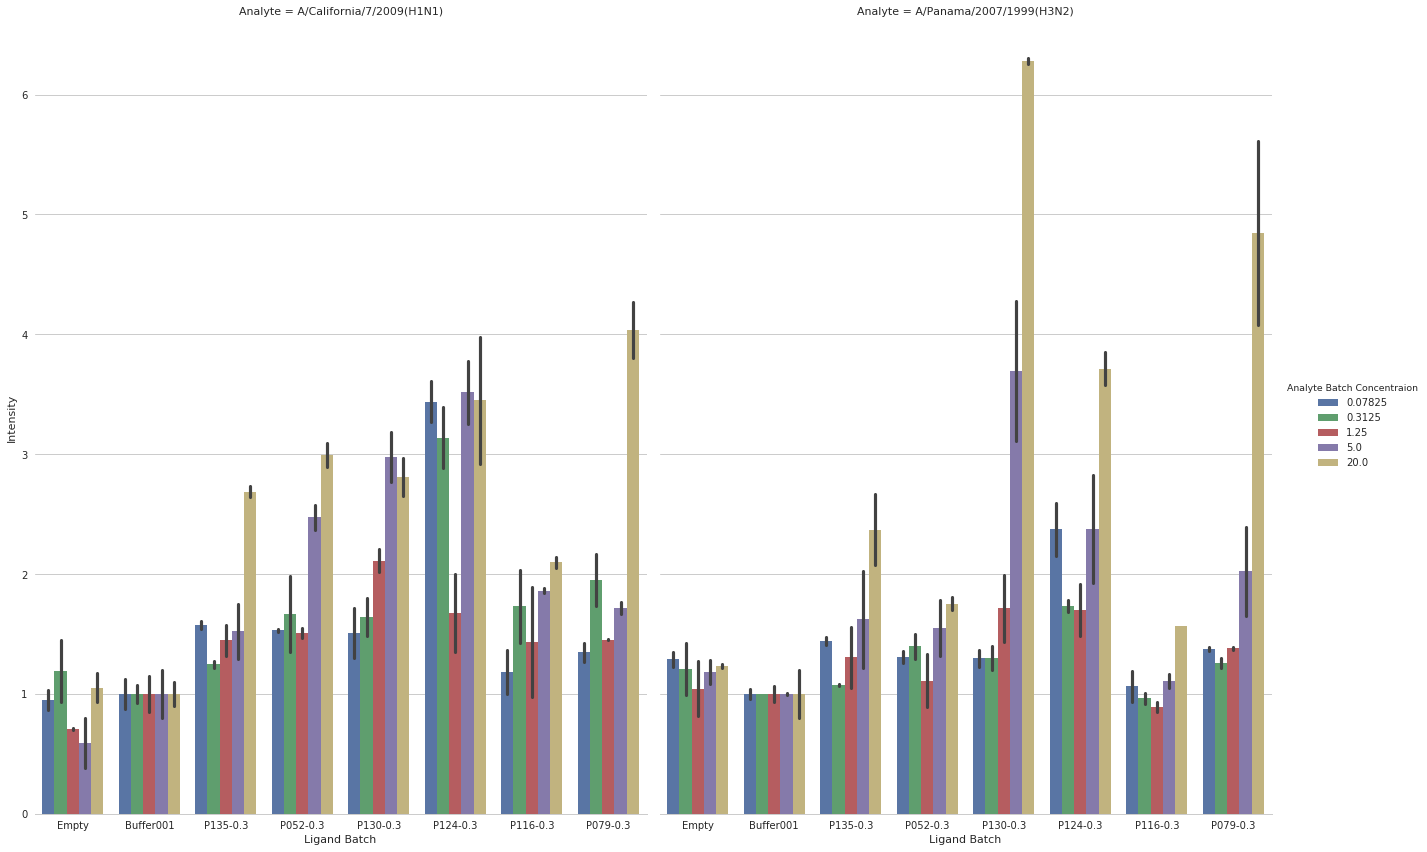

In [86]:
g = sns.factorplot(x="Ligand Batch", y="Intensity", col="Analyte", hue="Analyte Batch Concentraion",kind="bar", data=data_elisa_norm1.spots_pd, size=12, aspect=.75)#,capsize=.2)
g.despine(left=True)
plt.show()

In [39]:
list_of_concentrations = np.array([1,2,4,8,16,32,64,128,256,512,1024,2048])

In [40]:
list_of_concentrations = [np.sqrt(1/con) for con in  list_of_concentrations]
list_of_concentrations

[1.0,
 0.7071067811865476,
 0.5,
 0.3535533905932738,
 0.25,
 0.1767766952966369,
 0.125,
 0.08838834764831845,
 0.0625,
 0.04419417382415922,
 0.03125,
 0.02209708691207961]

In [41]:
frames = []
for _ in range(8):
    perm = np.random.permutation(list_of_concentrations)
    frames.append(pd.Series(perm))
random_concentrations = pd.concat(frames, axis=1).transpose()  

In [42]:
random_concentrations.to_clipboard()

In [25]:
pd.Series(list_of_concentrations).to_clipboard()